1-Data Read,Write and Inspect

In [13]:
#Dataset for the Task: "bank.csv"

#1. Load the provided dataset and import in pandas DataFrame.
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/bank .csv')

#2. Check info of the DataFrame and identify following:

#(a) columns with dtypes=object
object_column=df.select_dtypes(include='object').columns
print(f"columns with dtypes=object : {list(object_column)}")
print("---------------------------------------------")

#(b) unique values of those columns.
unique_values = {}
for col in object_column:
    unique_values[col] = df[col].unique()
print("unique values of those columns : \n")
for col, values in unique_values.items():
    print(f"{col}: {values}")
print("---------------------------------------------")

#(c) check for the total number of null values in each column.
null_values=df.isnull().sum()
print("total number of null values in each column : \n",null_values)
print("---------------------------------------------")


#3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in”.csv” with name ”banknumericdata.csv”
df_exlcude_Object=df.drop(columns=object_column)
df_exlcude_Object.to_csv('banknumericdata.csv',index=False)
print("the data saved as banknumericdata.csv")
print("---------------------------------------------")

#4. Read "banknumericdata.csv” and Find the summary statistics.
df2=pd.read_csv('/content/banknumericdata.csv')
summary_statistic=df2.describe()
print("summary statistic : ")
print(summary_statistic)
print("---------------------------------------------")



columns with dtypes=object : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
---------------------------------------------
unique values of those columns : 

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']
---------------------------------------------
total number of null values in each column : 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign    

#2: Data Imputations

In [11]:
# 1. Load the provided dataset and import it into a Pandas DataFrame
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/medical_students_dataset.csv')

# 2. Check info of the DataFrame
print("\nInitial DataFrame Info:")
print(df2.info())

# 2.1 Identify columns with missing (null) values
null = df2.isnull().sum()
print("\nColumns with missing values:")
print(null[null > 0])

# 3. Fill missing values
print("\nFilling missing values:")
for column in null[null > 0].index:
    if df2[column].dtype == 'float64' or df2[column].dtype == 'int64':
        # Fill numeric columns with the mean of the column
        df2[column] = df2[column].fillna(df2[column].mean())
        print(f"Filled missing values in '{column}' with the mean value of the column.")
    elif df2[column].dtype == 'object':
        # Fill object (categorical) columns with the mode of the column
        df2[column] = df2[column].fillna(df2[column].mode()[0])
        print(f"Filled missing values in '{column}' with the most common (mode) value.")

# 4. Check for duplicate rows
print("\nChecking for duplicate rows...")
duplicates_count = df2.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicates if any
if duplicates_count > 0:
    df2 = df2.drop_duplicates()
    print("Duplicate rows dropped.")

# 5. Final DataFrame Info
print("\nFinal DataFrame Info:")
print(df2.info())



Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height        

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”: Dataset Used: "titanic.csv"

Problem - 1: Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

Problem - 2: How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

In [16]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic-Dataset.csv")
#problem 1 :
df_subset=df[['Name','Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df_class=df_subset[df_subset['Pclass']==1]

mean_fare=df_class['Fare'].mean()
median_fare=df_class['Fare'].mean()
max_fare=df_class['Fare'].max()
min_fare=df_class['Fare'].min()
row_o=df_class[df_class['Fare']==0]

print("The mean fare = ",mean_fare)
print("The median fare = ",median_fare)
print("The maximum fare = ",max_fare)
print("The Minimum fare = ",min_fare)

print("------------------------another question------------------")
#problem 2 :

df_nulldata=df_class['Age'].isnull().sum()
print(f"Rows before dropping null values: {df_nulldata}")
#30 rows have null value in age
df_drop= df_class.dropna(subset=['Age'])
rows_after = df_drop['Age'].isnull().sum()
print(f"Rows after dropping null values: {rows_after}")



The mean fare =  84.1546875
The median fare =  84.1546875
The maximum fare =  512.3292
The Minimum fare =  0.0
------------------------another question------------------
Rows before dropping null values: 30
Rows after dropping null values: 0


Problem 3:The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

In [18]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic-Dataset.csv")

# Tasks:
# 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2. Add these new columns to the original DataFrame.
df = pd.concat([df, embarked_dummies], axis=1)

# 3. Drop the original ’Embarked’ column.
df.drop(columns=['Embarked'], inplace=True)

# 4. Print the first few rows of the modified DataFrame to verify the changes.
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


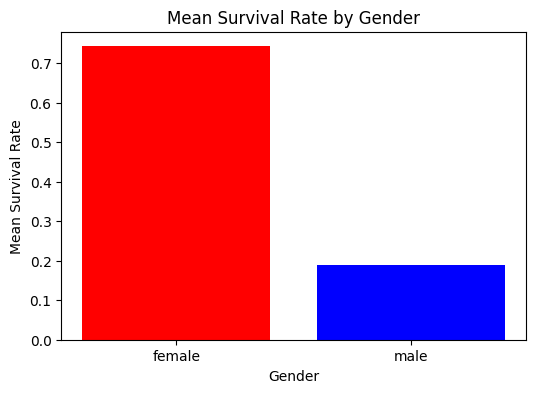

In [21]:
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic-Dataset.csv")


mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(f"Mean survival rate by gender:\n{mean_survival_by_gender}")

# Bar plot to show the mean survival rate by gender
plt.figure(figsize=(6, 4))
plt.bar(mean_survival_by_gender.index, mean_survival_by_gender.values, color=['red', 'blue'])
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

5:Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em- barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean survival rate by gender and embarkation port:
Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


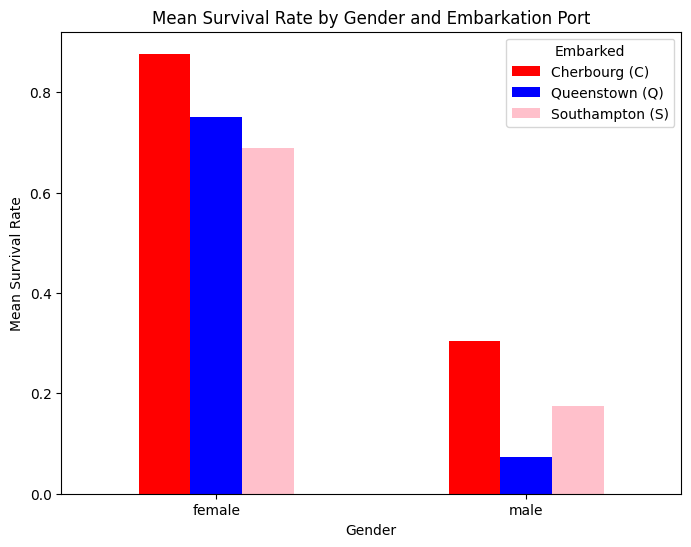

In [22]:
mean_survival_by_gender_and_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
print(f"Mean survival rate by gender and embarkation port:\n{mean_survival_by_gender_and_embarked}")

# Bar plot to show the mean survival rate by gender and embarkation port
mean_survival_by_gender_and_embarked.plot(kind='bar', figsize=(8, 6), color=['red', 'blue', 'pink'])
plt.title('Mean Survival Rate by Gender and Embarkation Port')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Embarked', labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class and age group. Draw a visualization using a any plotting library to represent this graphically.

Mean survival rate by Pclass and Age Group:
AgeGroup        Q1        Q2        Q3        Q4        Q5
Pclass                                                    
1         0.809524  0.761905  0.666667  0.777778  0.506667
2         0.742857  0.400000  0.416667  0.461538  0.363636
3         0.333333  0.197674  0.283582  0.166667  0.088235


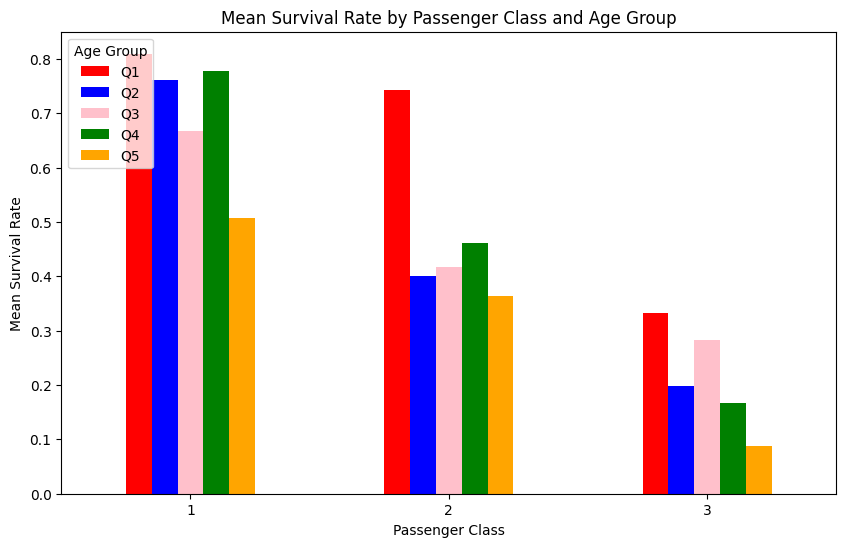

In [23]:
age_quantiles = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df['AgeGroup'] = age_quantiles

mean_survival_by_class_and_age = df.groupby(['Pclass', 'AgeGroup'], observed=False)['Survived'].mean().unstack()

print(f"Mean survival rate by Pclass and Age Group:\n{mean_survival_by_class_and_age}")

# Plot the mean survival rate by Pclass and Age Group
mean_survival_by_class_and_age.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'pink', 'green', 'orange'])
plt.title('Mean Survival Rate by Passenger Class and Age Group')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group', loc='upper left', labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
plt.show()